In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


**Heart disease prediction**

The medical industry and relies on factors such as the physical examination, symptoms and signs of the patient.Factors that influence heart disease are body cholesterol levels, smoking habit and obesity, family history of illnesses, blood pressure, and work environment. 

Machine learning algorithms play an essential and precise role in the prediction of heart disease.
Heart disease is seen as the world’s deadliest disease of human life. In particular, in this type of disease, the heart is not able to push the required amount of blood to the remaining organs of the human body to perform regular functions.

Now we have to import the necessary librarys as show below 

In [2]:
#importing python libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sb.set_style("whitegrid")
plt.style.use("fivethirtyeight")

After importing the python libraies we will be importing the data set using pandas  

In [3]:
df = pd.read_csv('../input/heart-disease-uci/heart.csv')

To view the first 5 rows of the data set:

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


To get the columns names and is data types:

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


**EDA Exploratory Data analysis**
For this data set we have to create a model and train it for logistic regression.So before  we train the model for logistic regression we have to first explore the data sets which means that we have to first analyze the data to see what it is going to work with.
EDA helps us find answers to some important questions such as: What question (s) are you trying to solve? How can you add, change, or remove features to get the most out of your data?What kind of data do we have and how do we handle the different types? Where are the outliers and why should you care? What is missing in the data and how do you deal with it? 

In [6]:
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


<AxesSubplot:>

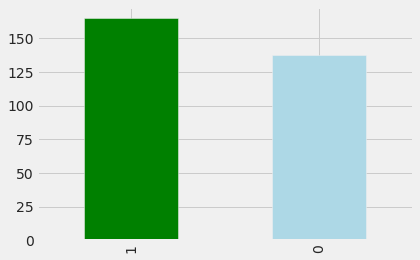

In [7]:
df.target.value_counts().plot(kind="bar", color=["green", "lightblue"])

Here by ploting the target values we can obsrerve that 165 people with heart disease and 138 people without heart disease, so our problem is balanced.

In [8]:
# Checking for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

After checking for the null values we can observe that the dataset has no null vaules  

In [9]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('*************************************************************************')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

*************************************************************************
age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
*************************************************************************
sex : [1 0]
*************************************************************************
cp : [3 2 1 0]
*************************************************************************
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
*************************************************************************
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 2

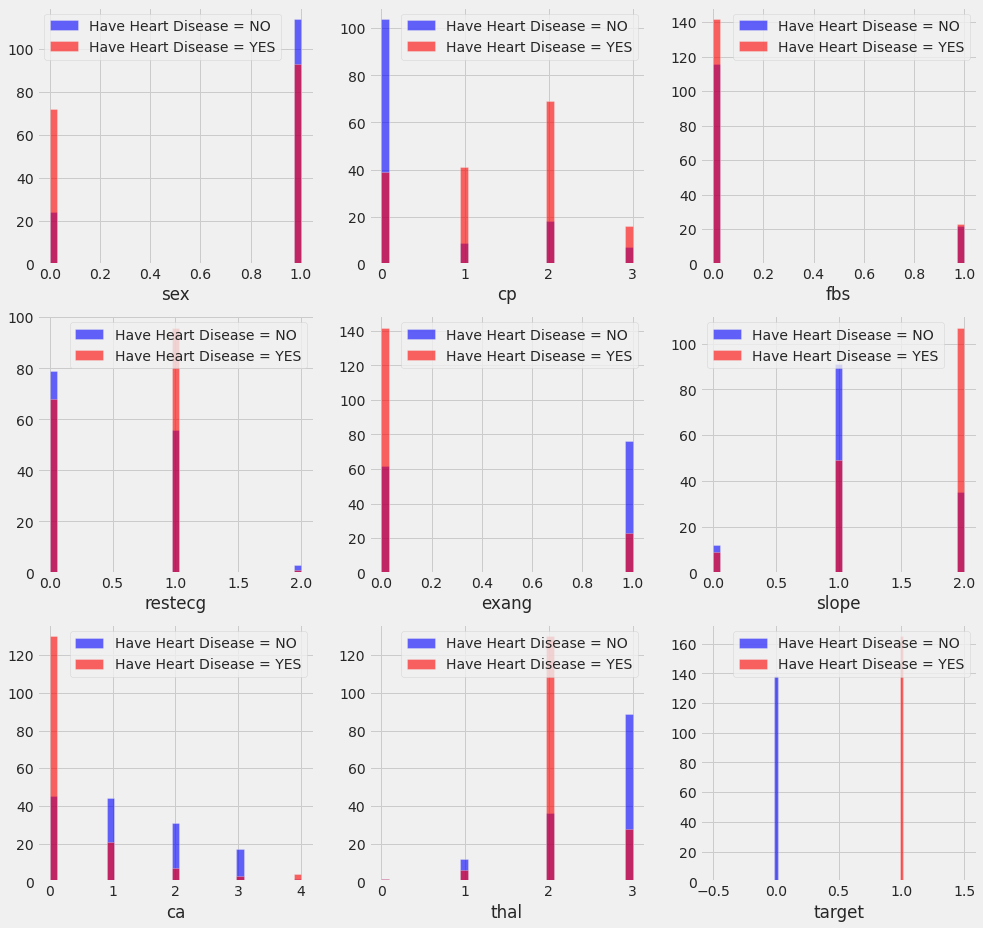

In [10]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

**Observations from the above plot:**

**cp {Chest pain}**: People with cp 1, 2, 3 are more likely to have heart disease than people with cp 0.

**restecg {resting EKG results}**: People with a value of 1 (reporting an abnormal heart rhythm, which can range from mild symptoms to severe problems) are more likely to have heart disease.

**exang {exercise-induced angina}**: people with a value of 0 (No ==> angina induced by exercise) have more heart disease than people with a value of 1 (Yes ==> angina induced by exercise)

**slope {the slope of the ST segment of peak exercise}**: People with a slope value of 2 (Downslopins: signs of an unhealthy heart) are more likely to have heart disease than people with a slope value of 2 slope is 0 (Upsloping: best heart rate with exercise) or 1 (Flatsloping: minimal change (typical healthy heart)).

**ca {number of major vessels (0-3) stained by fluoroscopy}**: the more blood movement the better, so people with ca equal to 0 are more likely to have heart disease.

**thal {thalium stress result}**: People with a thal value of 2 (defect corrected: once was a defect but ok now) are more likely to have heart disease.


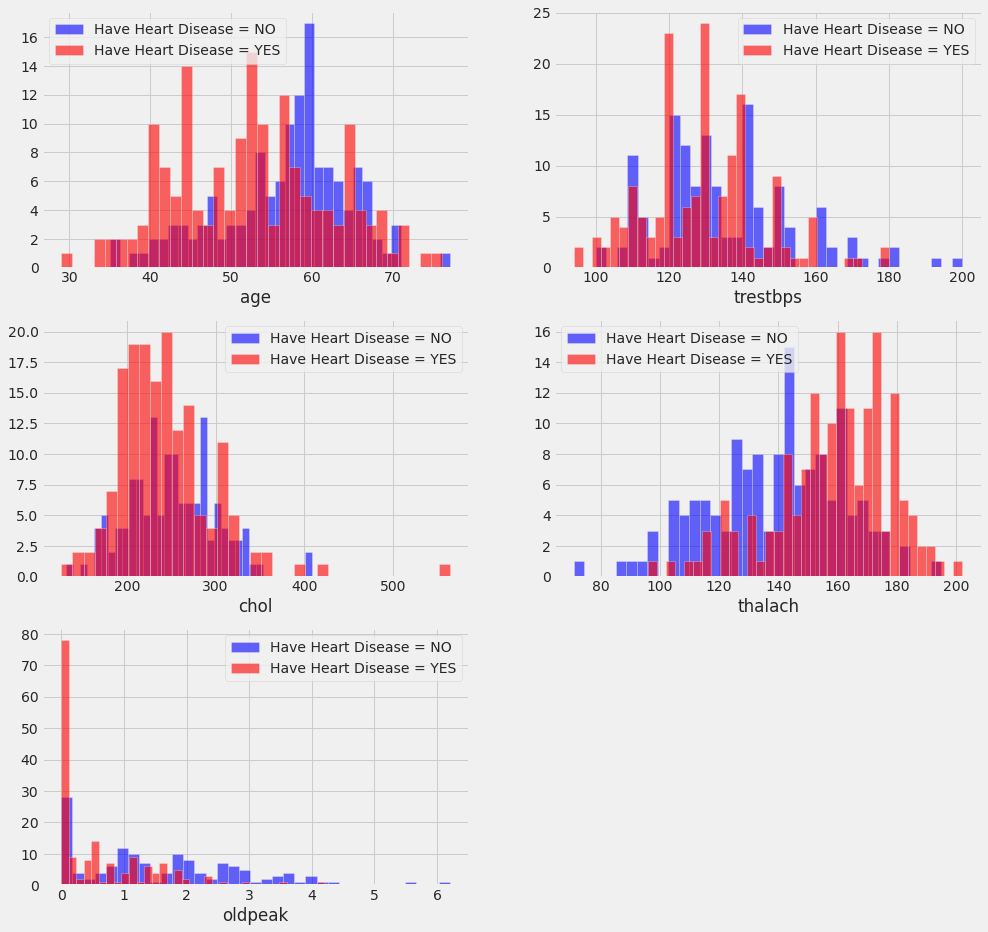

In [11]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

**Observations from the above plot:**

* **trestbps**: resting blood pressure anything above 130-140 is generally of concern

* **chol:** greater than 200 is of concern.
 
* **thalach:** People with a maximum of over 140 are more likely to have heart disease.
 
* **the old peak of exercise**-induced ST depression vs. rest looks at heart stress during exercise an unhealthy heart will stress more.

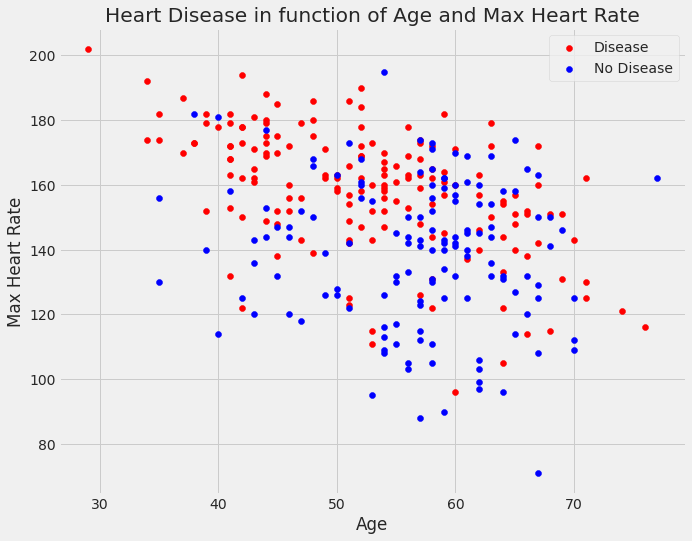

In [12]:
# Create another figure
plt.figure(figsize=(10, 8))

# Scatter with postivie examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="red")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="blue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

Here in the above scatter plot we can observe the age groups prone to maximum heart diseases

**Correlation Matrix**
we will be finding correlation matrix through the heat maps. 

(14.5, -0.5)

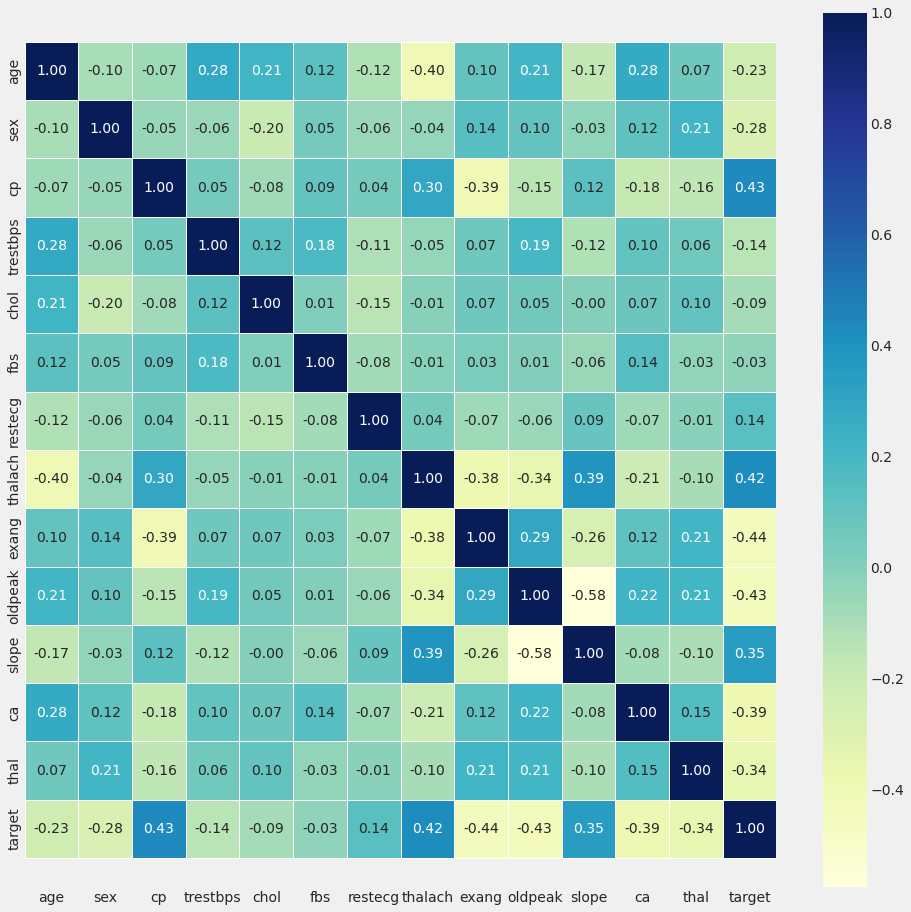

In [13]:

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sb.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<AxesSubplot:title={'center':'Correlation with target'}>

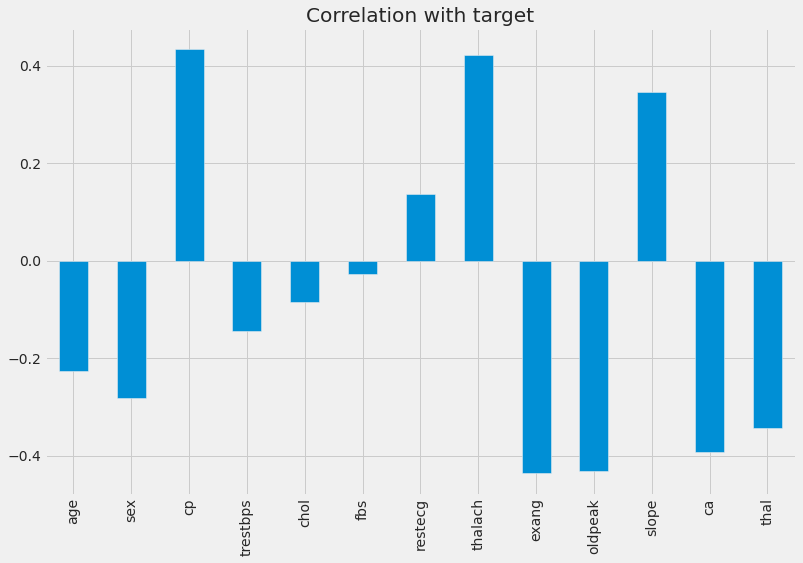

In [14]:
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

**The above shows the plot shows the correlation with the target**

* fbs and chol are the least correlated with the target variable.
* All other variables have a significant correlation with the target variable.

**DATA proccessing**

After exploring the dataset, we can observe that we need to convert some categorical variables to dummy variables and scale all values before training the machine learning models.

In [15]:
categorical_val.remove('target')
dataset = pd.get_dummies(df, columns = categorical_val)

from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

**Applying the Logistic Regression**
Now finally we can apply finally train machine learing model using the logistic regression algorithm to predict the heart disease

First we have to import the accuracy score, confusion matrix, classification report from sklean function.

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n*********************************************")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("-------------------------------------------------------------------------")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n***********************************************************")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("-------------------------------------------------------------------------")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("-------------------------------------------------------------------------")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

**Spliting the data sets for training and testing**

Now we will be splitting the data 70% training and 30% testing:

In [17]:
from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Now we will train the machine learning model and print the classification report of our logistic regression model:**

In [18]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
*********************************************
Accuracy Score: 86.79%
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision  0.88   0.86      0.87       0.87          0.87
recall     0.82   0.90      0.87       0.86          0.87
f1-score   0.85   0.88      0.87       0.87          0.87
support   97.00 115.00      0.87     212.00        212.00
-------------------------------------------------------------------------
Confusion Matrix: 
 [[ 80  17]
 [ 11 104]]

Test Result:
***********************************************************
Accuracy Score: 86.81%
-------------------------------------------------------------------------
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision  0.87  0.87      0.87       0.87          0.87
recall     0.83  0.90      0.87       0.86          0.87
f1-score   0.85  0.88      0.87       0.87      

In [19]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.79,86.81


**As we can see the model performs very well of the test set as it is giving almost the same accuracy in the test set as in the training set. We could see applying the logistic regression gives 86.81% of the total accuracy.**

Even Random forest algorithm can be applied to the same data set which also gives almost the same accuracy around 78-79% percentage.